In [41]:
#IMPORTACION DE LIBRERIAS PARA LA MUESTRA DE LA MATRIZ DE EFECTIVIDAD
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#DATOS SOBRE LAS FOTOGRAFIAS Y SU TAMAÑO DE GESTIONAMIENTO
width_shape = 100
height_shape = 100
batch_size = 10
#NUMERO DE CLASES 
names = ['Clase 1','Clase 2','Clase 3','Clase 4','Clase 5',
         'Clase 6','Clase 7','Clase 8']
#FUENTE DE DATOS PARA TEST
test_data_dir = './CarneDataset/test'  
#IMAGEDATAGENERATOR PARA LA CONFIGURACION DE RECUPERACION DE INFORMAION
test_datagen = ImageDataGenerator()
#CONFIGURACION DE FUNCION PARA GENERAR DATOS PARA EL TEST
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)
#INFO DEL MODELO GENERADO A RAIZ DEL ENTRENAMIENTO
custom_Model= load_model("./modelo/modelo.h5")
#GENERACION DE LAS PREDICCIONES
predictions = custom_Model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

Found 810 images belonging to 8 classes.
81/81 [==============================] - 10s 119ms/step


In [42]:
matc=confusion_matrix(y_real, y_pred)

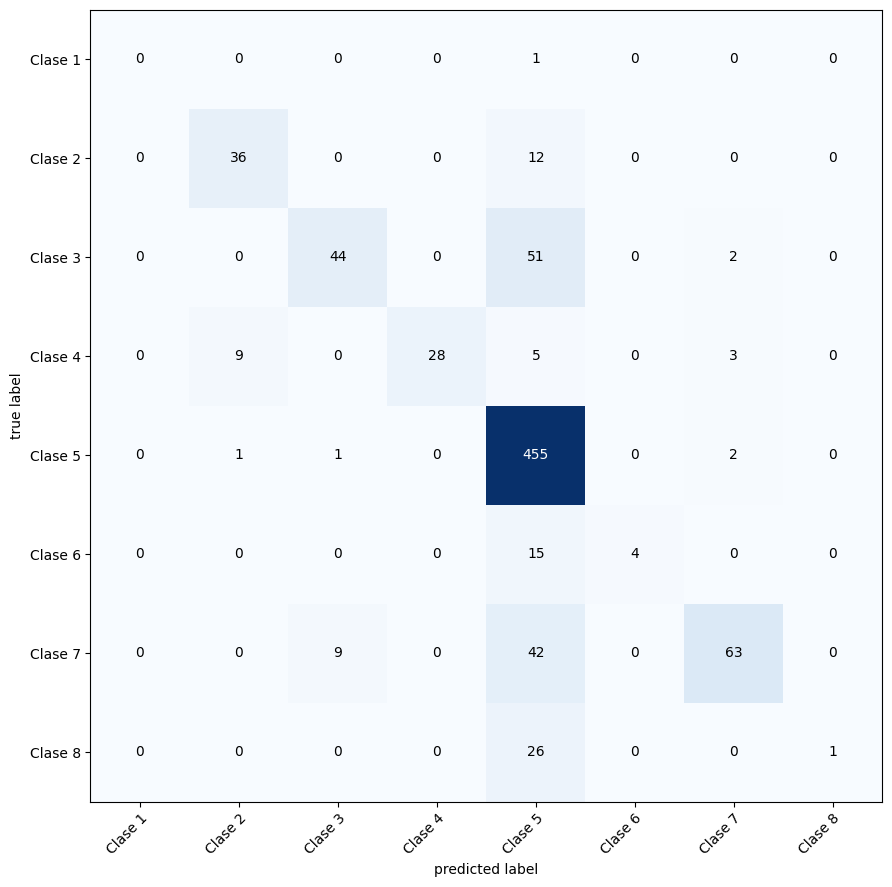

In [43]:
#GRAFICACION DE LOS DATOS Y SUS PREDICCIONES
plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names = names, show_normed=False)
plt.tight_layout()

In [44]:
#TABLA PARA VERIFICACION DE PARAMETROS DE CLASIFICACION
print(metrics.classification_report(y_real,y_pred, digits = 7))

              precision    recall  f1-score   support

           0  0.0000000 0.0000000 0.0000000         1
           1  0.7826087 0.7500000 0.7659574        48
           2  0.8148148 0.4536082 0.5827815        97
           3  1.0000000 0.6222222 0.7671233        45
           4  0.7495881 0.9912854 0.8536585       459
           5  1.0000000 0.2105263 0.3478261        19
           6  0.9000000 0.5526316 0.6847826       114
           7  1.0000000 0.0370370 0.0714286        27

    accuracy                      0.7790123       810
   macro avg  0.7808765 0.4521639 0.5091947       810
weighted avg  0.8077324 0.7790123 0.7484544       810



C:\entornoPy\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\entornoPy\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\entornoPy\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
